## Coding Exercise #0804

In [1]:
#Uncomment to force use of CPU.
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

### 1. Convolutional Neural Network with Keras (color images):

In [2]:
# Install if necessary.
#!pip install keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings                   
from sklearn.model_selection import train_test_split
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

2024-05-20 10:27:34.123053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 10:27:34.836440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### 1.1. Read in the data:

More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Bring in the data.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [3]:
# View the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


#### 1.2. Visualize the data:

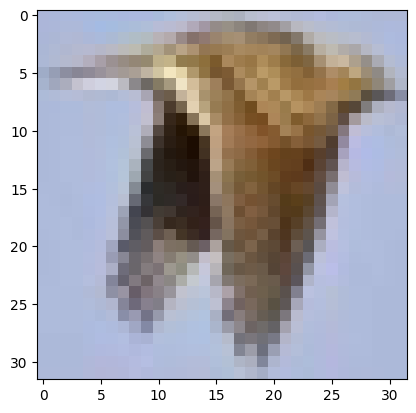

In [4]:
i_image = 123                                   # You may change this at will. 
plt.imshow(X_train[i_image,:,:])
plt.show()

#### 1.3. Prepare the data:

In [5]:
# Scaling.
X_train = X_train/255                   
X_test = X_test/255                        

In [6]:
# Reshaping.
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [7]:
# One-hot-encoding.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define a CNN model:

In [8]:
drop_prob = 0.7
my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(5,5),padding='same',activation="relu"))        # 3 channels of color.
my_model.add(MaxPooling2D(pool_size=2))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
# Flattened fully connected layer.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob))
# Output layer.
my_model.add(Dense(units = 10, activation="softmax"))

2024-05-20 10:27:58.421292: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 10:27:58.446308: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 10:27:58.446401: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 10:27:58.449812: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 10:27:58.449909: I external/local_xla/xla/stream_executor

In [9]:
# View the summary.
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259,274 (16.25 MB)

 Trainable params: 4,259,274 (16.25 MB)

 Non-trainable params: 0 (0.00 B)

#### 1.5. Define the hyperparameters and optimizer:

In [10]:
# Hyperparameters.
n_epochs = 20
batch_size = 20
learn_rate = 0.0001

In [11]:
# Define the optimizer and then compile.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Train the model and visualize the history:

In [ ]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.3, verbose = 1)

Epoch 1/20


I0000 00:00:1716193700.803227   20983 service.cc:145] XLA service 0x7f486c00a680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716193700.803291   20983 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-05-20 10:28:20.825867: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-20 10:28:20.927416: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  34/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1005 - loss: 2.3153

I0000 00:00:1716193704.303098   20983 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.3039 - loss: 1.9020 - val_accuracy: 0.4889 - val_loss: 1.4421
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4906 - loss: 1.4315 - val_accuracy: 0.5592 - val_loss: 1.2652
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5550 - loss: 1.2640 - val_accuracy: 0.5984 - val_loss: 1.1505
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5932 - loss: 1.1527 - val_accuracy: 0.6298 - val_loss: 1.0703
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6252 - loss: 1.0659 - val_accuracy: 0.6381 - val_loss: 1.0457
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6452 - loss: 1.0137 - val_accuracy: 0.6557 - val_loss: 0.9887
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6698 - loss: 0.9482 - val_accuracy: 0.6601 - val_loss: 0.9752
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6808 - loss: 0.9054 - val_accura

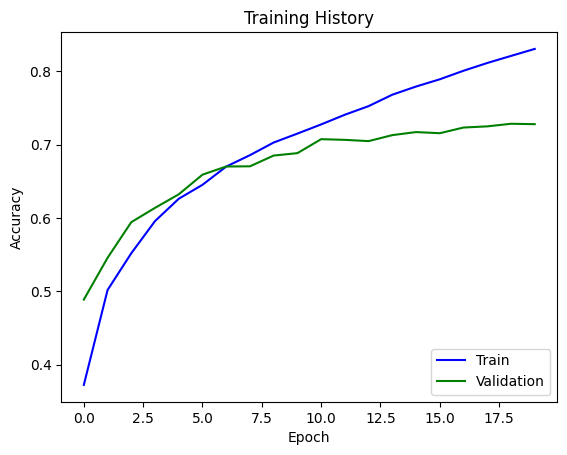

In [13]:
# Visualize the training history. 
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Testing: 

In [14]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.728
